(5 pts) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.

When to use Machine learning and when not to.. (250-500 words)

In [35]:
# Perform pre processing on the data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



titanic_df = pd.read_csv('titanic.csv')

#Drop columns that machine learning will not be using
columns = ['Ticket','Cabin','Name','Embarked']


titanic_df = titanic_df.drop(columns, axis=1)

# Interpolate values for the missing Age and Fare values

titanic_df['Age'] = titanic_df['Age'].interpolate()

titanic_df['Fare'] = titanic_df['Fare'].interpolate()

titanic_df.info()

# Drop rows that have missing values

titanic_df = titanic_df.dropna()

# Convert Sex to numerical values

sex_map = {'male':0,'female':1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_map)
titanic_df






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,22.5,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


<Axes: >

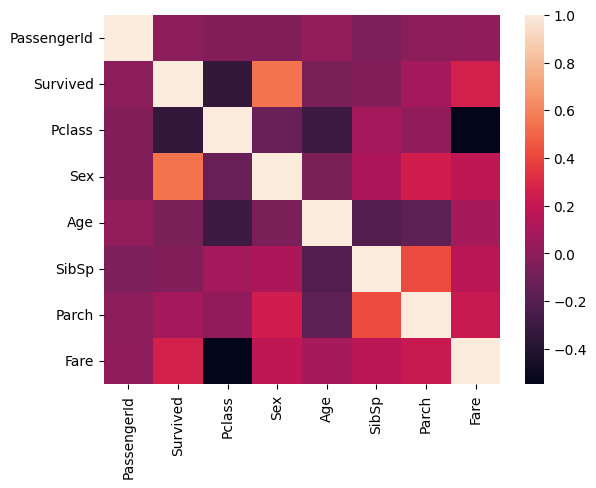

In [20]:
# Create a correlation matrix with a heatmap for the features.
 # Use markdown to write about your takeaways in under 200 words. Perform feature selection from this. You should likely not be selecting more than 10 features. 

sns.heatmap(titanic_df.corr())

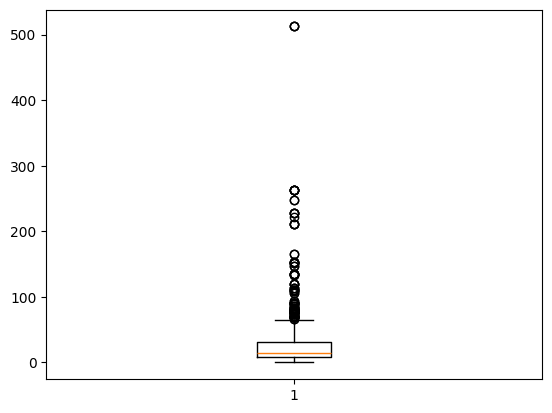

In [22]:
#  Create a box and whisker plot for loan_amounts if using the Lending Club dataset and fare if using the Titanic dataset. 
# How do you handle the null values? What does this box and whisker plot show you?


 
fare_df = titanic_df['Fare']
 


plt.boxplot(fare_df)
 
plt.show()

# This box and whisker plot shows me the volume of certain pricing for the Titanic fare.

# I handled the null values by interpolating them during pre processing.

In [38]:
#  If using the Lending Club dataset: create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, 
#Plains, Midwest, Northeast, and South. If using the Titanic dataset: create a new column called age_bin that groups people into at least 4 age ranges. 
#Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in markdown. 
#(use a timer to determine performance: check useful references below to see how timers work) 

titanic_df = titanic_df.assign(age_bin = lambda x : x['Age'])
# titanic_df = titanic_df.assign(age_lambda = lambda x: 'Child' if x <= 12 else ('Teenager' if x <= 17 else ('Adult' if x <= 64 else 'Elderly')))
#titanic_df['age_bin'] = titanic_df['Age'].apply(age_lambda)

    
# titanic_df['age_bin'] = titanic_df['Age'].apply(lambda age: get_age_group(age))


titanic_df.head(20)
# grouping_lambda = lambda x: 'Group A' if x < 10 else ('Group B' if x < 20 else 'Group C')

# df['Group_Column'] = df['Original_Column'].apply(grouping_lambda)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_bin
0,1,0,3,0,22.0,1,0,7.2500,22.0
1,2,1,1,1,38.0,1,0,71.2833,38.0
2,3,1,3,1,26.0,0,0,7.9250,26.0
3,4,1,1,1,35.0,1,0,53.1000,35.0
4,5,0,3,0,35.0,0,0,8.0500,35.0
5,6,0,3,0,44.5,0,0,8.4583,44.5
6,7,0,1,0,54.0,0,0,51.8625,54.0
7,8,0,3,0,2.0,3,1,21.0750,2.0
8,9,1,3,1,27.0,0,2,11.1333,27.0
9,10,1,2,1,14.0,1,0,30.0708,14.0


In [ ]:

#If using the Titanic dataset, create subplot histograms to show how fares differ by age_bin. 
#Summarize your findings in under 200 words.

